# MLOps Exercise: Medical Image Classification with Chest X-Ray Images

## Introduction

In this exercise, you'll gain practical experience with MLOps (Machine Learning Operations) by working on a real-world problem: classifying chest X-ray images to diagnose pneumonia. You'll go through various stages, from data cleaning to deployment, learning how to manage an end-to-end machine learning pipeline.

### Prerequisites

- Basic understanding of Python
- Familiarity with machine learning concepts
- Experience with Jupyter Notebooks

### Tools and Libraries

- Python
- NumPy
- OpenCV
- TensorFlow/Keras
- scikit-learn
- Flask
- Matplotlib
- imbalanced-learn

These libraries should cover most requirements for this exercise, including data manipulation (NumPy, pandas), visualization (Matplotlib), machine learning (scikit-learn, TensorFlow), image processing (OpenCV), and class imbalance treatment (imbalanced-learn).

### Table of Contents

1. [Data Loading and Cleaning](#Data-Loading-and-Cleaning)
2. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
3. [Class Imbalance](#Class-Imbalance)
4. [Model Building](#Model-Building)
5. [Data Augmentation](#Data-Augmentation)
6. [Model Evaluation](#Model-Evaluation)
7. [Model Deployment (Bonus)](#Model-Deployment-(Bonus))


## Environment Setup

Before we begin, let's set up the environment. We'll install the necessary Python packages for this exercise.

```bash
pip install numpy pandas opencv-python matplotlib scikit-learn tensorflow flask
```

You can also create a `requirements.txt` file with the above packages and install them using `pip install -r requirements.txt`.
Be aware that you should download ipykernel and export your env to the jupyter notebook.
```bash
python -m ipykernel install --user --name=my_new_env
```

## Data Loading and Cleaning

### Objective

Load the dataset and clean it by removing corrupted images.

### Guidance

1. Download the Chest X-Ray Images (Pneumonia) dataset and place it in a directory accessible by this notebook. From https://ametice.univ-amu.fr
2. Unzip the dataset and explore its directory structure.
3. Load the images and labels for training.
4. Write a function to scan for and remove any corrupted or invalid images.

### Exercise

Now, load the dataset use the zipfile library and clean it by removing corrupted images. Write your code in the cell below.

```python
import zipfile

zip_file_path = 'path/to/your/zip/file.zip'
extract_path = 'path/to/extract/folder'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
```

After extracting, your dataset should have the following folder structure:

```
/
|-- test/
|   |-- NORMAL/
|   |-- PNEUMONIA/
|-- train/
|   |-- NORMAL/
|   |-- PNEUMONIA/
|-- val/
    |-- NORMAL/
    |-- PNEUMONIA/
```

You can point `train_path` and `test_path` to the `train` and `test` folders inside this extracted directory

In [1]:
import zipfile

zip_file_path = 'D:\\ECM cours\\S9\\M2 SID\Methodologie pour la science des donnes\\Dataset.zip'
extract_path = 'D:\\ECM cours\\S9\\M2 SID\\Methodologie pour la science des donnes\\'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [2]:
import os

main_dataset_directory = 'D:\\ECM cours\\S9\\M2 SID\Methodologie pour la science des donnes\\chest_xray\\'

print("Contents of the main dataset directory:")
print(os.listdir(main_dataset_directory))

print("\nContents of the 'train' subdirectory:")
print(os.listdir(os.path.join(main_dataset_directory,'train')))

print("\nContents of the 'test' subdirectory:")
print(os.listdir(os.path.join(main_dataset_directory,'test')))

print("\nContents of the 'val' subdirectory:")
print(os.listdir(os.path.join(main_dataset_directory,'val')))

Contents of the main dataset directory:
['chest_xray', 'test', 'train', 'val']

Contents of the 'train' subdirectory:
['NORMAL', 'PNEUMONIA']

Contents of the 'test' subdirectory:
['NORMAL', 'PNEUMONIA']

Contents of the 'val' subdirectory:
['NORMAL', 'PNEUMONIA']


In [5]:
from PIL import Image
import os

def scan_and_remove_corrupted_images(main_dataset_directory):
    clean_data = []
    for folder in os.listdir(main_dataset_directory):
        if folder in ['train','test','val']:
            folder_path = os.path.join(main_dataset_directory,folder)
            for subfolder in ['NORMAL','PNEUMONIA']:
                subfolder_path = os.path.join(folder_path,subfolder)
                for files in os.listdir(subfolder_path):
                    file_path = os.path.join(subfolder_path,files)
                    try:
                        img = Image.open(file_path)
                        clean_data.append(file_path)
                    except Exception as e:
                        print(f"Image corrompue : {file_path}-{e}")
    return clean_data

clean_data = scan_and_remove_corrupted_images(main_dataset_directory)

print(f"Nombre total d'images propres : {len(clean_data)}")

Nombre total d'images propres : 5856


## Exploratory Data Analysis (EDA)

### Objective

Understand the dataset's basic statistics and visualize the data.

### Guidance

1. Use matplotlib to visualize some sample images from each class.
2. Investigate the distribution of classes (Pneumonia/Normal).

### Exercise

Perform exploratory data analysis on the dataset. Write your code in the cell below.


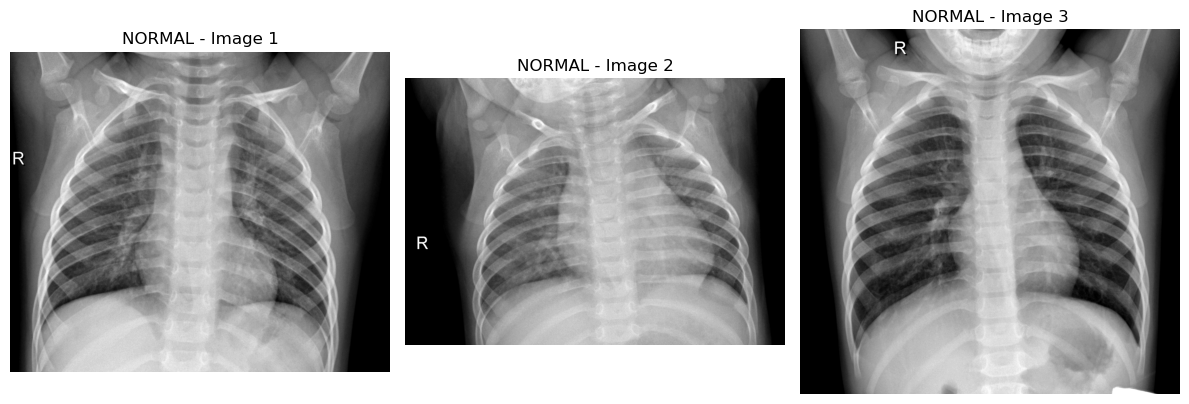

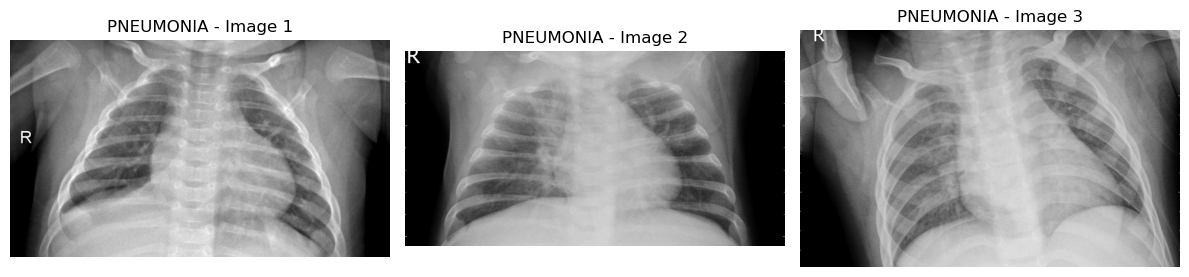

In [7]:
import matplotlib.pyplot as plt
import random

def visualize_images(main_dataset_directory, num_images_per_class=3):
    classes = ['NORMAL', 'PNEUMONIA']
    for class_name in classes:
        class_folder = os.path.join(main_dataset_directory, 'train', class_name)
        image_files = os.listdir(class_folder)
        
        selected_images = random.sample(image_files, num_images_per_class)
        
        plt.figure(figsize=(12,6))
        
        for i, image_file in enumerate(selected_images, 1):
            image_path = os.path.join(class_folder, image_file)
            img = Image.open(image_path)
            
            plt.subplot(1, num_images_per_class, i)
            plt.imshow(img, cmap='gray')
            plt.title(f'{class_name} - Image {i}')
            plt.axis('off')

        plt.tight_layout()
        plt.show()

visualize_images(main_dataset_directory, num_images_per_class=3)


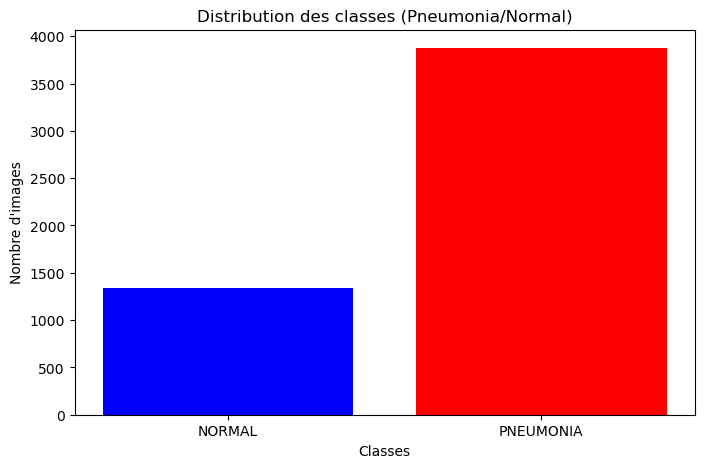

In [15]:
import matplotlib.pyplot as plt

def plot_class_distribution(main_dataset_directory):
    class_names = ['NORMAL', 'PNEUMONIA']
    class_counts = []

    for class_name in class_names:
        class_folder = os.path.join(main_dataset_directory, 'train', class_name)
        num_images = len(os.listdir(class_folder))
        class_counts.append(num_images)

    # Crée un diagramme à barres pour représenter la distribution des classes
    plt.figure(figsize=(8, 5))
    plt.bar(class_names, class_counts, color=['blue', 'red'])
    plt.xlabel('Classes')
    plt.ylabel('Nombre d\'images')
    plt.title('Distribution des classes (Pneumonia/Normal)')
    plt.show()

# Utilisez la fonction pour afficher la distribution des classes
plot_class_distribution(main_dataset_directory)


## Class Imbalance

### Objective

Understand how class imbalance affects model performance and learn ways to mitigate it.

### Guidance

1. Train a baseline model without accounting for class imbalance.
2. Evaluate its performance using metrics like accuracy, precision, recall, and F1-score.
3. Experiment with techniques like class weighting or oversampling methods like SMOTE to balance the classes.

### Exercise

Address the class imbalance and evaluate the impact on the model. Write your code in the cell below.


In [ ]:

# Your code here for Class Imbalance


## Model Building

### Objective

Build and train a deep learning model for image classification.

### Guidance

1. Use a Convolutional Neural Network (CNN) for this task.
2. Experiment with different architectures and hyperparameters.

### Exercise

Build and train your model. Write your code in the cell below.


In [ ]:

# Your code here for Model Building


## Data Augmentation

### Objective

Improve your model's performance by using data augmentation techniques.

### Guidance

1. Apply data augmentation techniques like rotation, flipping, and zooming to generate more training data.
2. Retrain your model using the augmented dataset.

### Exercise

Apply data augmentation techniques and evaluate the impact on the model. Write your code in the cell below.


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Répertoire contenant les images d'entraînement
train_data_dir = os.path.join(main_dataset_directory, 'train')

# Créer un générateur d'images avec des transformations
datagen = ImageDataGenerator(
    rotation_range=40,      # Angle de rotation aléatoire entre -40 et 40 degrés
    width_shift_range=0.2,  # Décalage horizontal aléatoire de 20%
    height_shift_range=0.2, # Décalage vertical aléatoire de 20%
    shear_range=0.2,        # Déformation de cisaillement aléatoire de 20%
    zoom_range=0.2,         # Zoom aléatoire de 20%
    horizontal_flip=True,   # Retournement horizontal aléatoire
    fill_mode='nearest'     # Remplir les pixels manquants avec la valeur la plus proche
)

# Utiliser le générateur pour augmenter les données et les enregistrer dans un nouveau répertoire
augmented_data_dir = 'D:\\ECM cours\\S9\\M2 SID\\Methodologie pour la science des donnes\\augmented_data'
os.makedirs(augmented_data_dir, exist_ok=True)

# Créer un générateur de données augmentées pour la classe NORMAL
normal_generator = datagen.flow_from_directory(
    os.path.join(train_data_dir, 'NORMAL'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    save_to_dir=augmented_data_dir + '\\NORMAL',
    save_prefix='aug',
    save_format='jpeg'
)

# Générer et enregistrer les images augmentées
num_augmented_images = 1000  # Nombre d'images augmentées à générer par classe
for i in range(num_augmented_images):
    next(pneumonia_generator)
    next(normal_generator)

# Maintenant, vous avez des images augmentées dans le répertoire 'augmented_data'


Found 0 images belonging to 0 classes.


## Model Evaluation

### Objective

Evaluate your model's performance using different metrics and visualization tools.

### Guidance

1. Use metrics like accuracy, precision, recall, and F1-score for evaluation.
2. Plot confusion matrices and ROC curves to visualize your model's performance.

### Exercise

Evaluate your model and interpret the results. Write your code in the cell below.


In [ ]:

# Your code here for Model Evaluation


## Model Deployment (Bonus)

### Objective

Learn the basics of deploying a machine learning model.

### Guidance

1. Save your trained model.
2. Use Flask to create a simple REST API to serve your model.

### Exercise

Deploy your model using Flask. Write your code in the cell below.


In [ ]:

# Your code here for Model Deployment (Bonus)



### Next Steps

1. Experiment with more advanced architectures and hyperparameters.
2. Deploy your model
3. Integrate your model into a web application or other services.
4. Learn more about MLOps best practices and tools.


